## Implement with pure python code

In [1]:
import math

class KNN:
  def __init__(self, k=3, dist_func="eucleadian"):
    self.k = k
    self.dist_func = dist_func

  def load(self, data):
    self.data= data

  def distance(self, x, y):
    if self.dist_func == "eucleadian":
      return self.get_distance(x, y)
    else:
      raise ValueError("distance function is not defined.")

  def get_distance(self, x, y):
    s = 0
    for i in range(len(x)):
      s += (x[i] - y[i])**2
    d = math.sqrt(s)
    return d

  def get_labels_k_neighbors(self, x):
      #data_copy = deepcopy(self.data)
      ranked = []
      for idx, row in enumerate(self.data):
        dist = self.distance(x, row[:-1])
        ranked.append([dist, idx])
      ranked.sort()
      neighbors = ranked[:self.k]
      classes = [self.data[i][-1] for d, i in neighbors]
      return classes

  #classification
  def predict_class(self, x):
    if self.data:
      classes = self.get_labels_k_neighbors(x)
      major_class = classes.count(1)
      if major_class/self.k < 0.5:
        pred_class = 0
      else:
        pred_class = 1
      return pred_class
    else:
      return None

  # regression
  def predict_val(self, x):
    if self.data:
      classes = self.get_labels_k_neighbors(x)
      return sum(classes)/self.k
    else:
      return None

In [2]:
data = [
        [1,3,0],
        [1,4,0],
        [2,1,0],
        [2,4,0],
        [2,5,0],
        [4,6,0],
        [4,1,1],
        [4,2,1],
        [5,4,1],
        [6,2,1],
        [7,3,1],
        [7,4,1],
]

In [3]:
import matplotlib.pyplot as plt

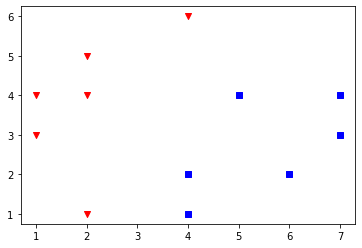

In [4]:
x0 = [t[0] for t in data if t[2]==0]
y0 = [t[1] for t in data if t[2]==0]
x1 = [t[0] for t in data if t[2]==1]
y1 = [t[1] for t in data if t[2]==1]
plt.scatter(x0, y0, marker='v', color="red")
plt.scatter(x1, y1, marker='s',  color="blue")
plt.show()

In [5]:
knn = KNN(4)

In [6]:
knn.load(data)

In [7]:
test = [5,2]

In [8]:
knn.predict_class(test)

1

In [9]:
test = [3.5,4]
knn.predict_class(test)

0

In [10]:
# Test for regression

In [11]:
data2 = [
        [1,3,4],
        [1,4,5],
        [2,1,5],
        [2,4,8],
        [2,5,9],
        [4,6,22],
        [4,1,17],
        [4,2,18],
        [5,4,29],
        [6,2,38],
        [7,3,52],
        [7,4,53],
]

In [12]:
knnr = KNN(2)
knnr.load(data2)

In [13]:
tr1 = [3,1]
knnr.predict_val(tr1)

11.0

In [14]:
# test for scalability

In [15]:
data3 = [[i, j, 2*i*i+j] for i in range(1000) for j in range(1000)]

In [16]:
knnr = KNN(4)
knnr.load(data3)

In [17]:
tr2 = [30.1, 550]
knnr.predict_val(tr2)

2380.5

## Implement with Numpy

In [18]:
import math
import numpy as np

class KNN2:
  def __init__(self, k=3, dist_func="eucleadian"):
    self.k = k
    self.dist_func = dist_func

  def load(self, data):
    if type(data) is list:
      self.data= np.array(data)
    elif type(data) is np.ndarray:
      self.data = data
    else:
      raise ValueError("Not supported input type")

  def distance(self, x, y):
    if self.dist_func == "eucleadian":
      return self.get_distance(x, y)
    else:
      raise ValueError("distance function is not defined.")

  def get_distance(self, x, y):
    s = 0
    s = (x - y)**2
    d = math.sqrt(sum(s))
    return d

  def get_labels_k_neighbors(self, x):
      ranked = []
      for idx, row in enumerate(self.data):
        dist = self.distance(x, row[:-1])
        ranked.append([dist, idx])
      ranked.sort()
      neighbors = ranked[:self.k]
      classes = [self.data[i][-1] for d, i in neighbors]
      return np.array(classes)

  #classification
  def predict_class(self, x):
    if self.data:
      classes = self.get_labels_k_neighbors(x)
      major_class = len(classes[classes==1])
      if major_class/self.k < 0.5:
        pred_class = 0
      else:
        pred_class = 1
      return pred_class
    else:
      return None

  # regression
  def predict_val(self, x):
    if len(self.data) > 0:
      classes = self.get_labels_k_neighbors(x)
      return sum(classes)/self.k
    else:
      return None

In [19]:
data2 = [
        [1,3,4],
        [1,4,5],
        [2,1,5],
        [2,4,8],
        [2,5,9],
        [4,6,22],
        [4,1,17],
        [4,2,18],
        [5,4,29],
        [6,2,38],
        [7,3,52],
        [7,4,53],
]

In [20]:
knn2 = KNN2(2)
knn2.load(data2)

In [21]:
tt1 = [3, 1]
knn2.predict_val(tt1)

11.0